Step 1: Using Linear Regression and Random Forest for prediction (Machine Learning Techniques)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
file_path_2022 = r"C:\Users\duezg\Downloads\Data Sets\2022 player data with salaries.xlsx"
file_path_2023_wr = r"C:\Users\duezg\Downloads\Data Sets\2023 Top 50 WRs Data.xlsx"
file_path_2023_rb = r"C:\Users\duezg\Downloads\Data Sets\2023 Top 50 RBs Data.xlsx"
file_path_2023_te = r"C:\Users\duezg\Downloads\Data Sets\2023 Top 30 TEs Data.xlsx"
file_path_2023_qb = r"C:\Users\duezg\Downloads\Data Sets\2023 Top 30 QBs Data.xlsx"

# Load the data
df_2022 = pd.read_excel(file_path_2022)
df_2023_wr = pd.read_excel(file_path_2023_wr)
df_2023_rb = pd.read_excel(file_path_2023_rb)
df_2023_te = pd.read_excel(file_path_2023_te)
df_2023_qb = pd.read_excel(file_path_2023_qb)

# Inspect data
print("2022 Player Data with Salaries:\n", df_2022.head())
print("\n2023 WR Data:\n", df_2023_wr.head())
print("\n2023 RB Data:\n", df_2023_rb.head())
print("\n2023 TE Data:\n", df_2023_te.head())
print("\n2023 QB Data:\n", df_2023_qb.head())


2022 Player Data with Salaries:
    Rank            Player Team  Fantasy_Points_Total  Fantasy_Points_Per_Week  \
0     1   Patrick Mahomes  KAN                411.80                24.223529   
1     2        Josh Allen  BUF                389.52                24.345000   
2     1     Austin Ekeler  LAC                368.70                21.688235   
3     3       Jalen Hurts  PHI                366.04                24.402667   
4     2  Justin Jefferson  MIN                365.30                21.488235   

  Pos  Games  Pass Yds  Pass TD  Pass Int  Rush Yds  Rush TD  Fumbles  \
0  QB     17    5250.0     41.0      12.0     358.0      4.0        5   
1  QB     16    4283.0     35.0      14.0     762.0      7.0       13   
2  RB     17       NaN      NaN       NaN       NaN      NaN        5   
3  QB     15    3701.0     22.0       6.0     760.0     13.0        9   
4  WR     17       NaN      NaN       NaN       NaN      NaN        0   

   Scrimmage Yds  Total TD    Rec      Sa

In [ ]:
def preprocess_data(df):
    numeric_cols = ['Fantasy_Points_Per_Week', 'Games', 'Pass Yds', 'Pass TD', 'Rush Yds',
                    'Rush TD', 'Fumbles', 'Scrimmage Yds', 'Total TD', 'Rec', 'Salary']

    # Convert to numeric, coercing errors to NaN
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with missing critical data
    df.dropna(subset=['Fantasy_Points_Per_Week', 'Games', 'Pos'], inplace=True)

    # Fill missing performance stats with 0
    perf_cols = ['Pass Yds', 'Pass TD', 'Rush Yds', 'Rush TD', 'Fumbles', 'Scrimmage Yds', 'Total TD', 'Rec']
    df[perf_cols] = df[perf_cols].fillna(0)

    # Fill missing Salary with median salary for the player's position
    if 'Salary' in df.columns:
        df['Salary'] = df.groupby('Pos')['Salary'].transform(lambda x: x.fillna(x.median()))

    # Fill any remaining NaN values with 0
    df.fillna(0, inplace=True)

    return df

# Preprocess all datasets
df_2022 = preprocess_data(df_2022)
df_2023_wr = preprocess_data(df_2023_wr)
df_2023_rb = preprocess_data(df_2023_rb)
df_2023_te = preprocess_data(df_2023_te)
df_2023_qb = preprocess_data(df_2023_qb)

print(df_2022)
print(df_2023_wr)
print(df_2023_rb)
print(df_2023_te)
print(df_2023_qb)

     Rank               Player Team  Fantasy_Points_Total  \
0       1      Patrick Mahomes  KAN                411.80   
1       2           Josh Allen  BUF                389.52   
2       1        Austin Ekeler  LAC                368.70   
3       3          Jalen Hurts  PHI                366.04   
4       2     Justin Jefferson  MIN                365.30   
..    ...                  ...  ...                   ...   
586    82            Tim Boyle  CHI                 -0.88   
587   379      KaVontae Turpin  DAL                 -2.40   
588    83           Chad Henne  KAN                 -2.50   
589   380  Montrell Washington  DEN                 -2.80   
590   381          Keke Coutee  IND                 -5.00   

     Fantasy_Points_Per_Week Pos  Games  Pass Yds  Pass TD  Pass Int  \
0                  24.223529  QB     17    5250.0     41.0      12.0   
1                  24.345000  QB     16    4283.0     35.0      14.0   
2                  21.688235  RB     17       0.0  

In [ ]:
# Features and target for 2022 data
features = ['Games', 'Pass Yds', 'Pass TD', 'Rush Yds', 'Rush TD', 'Fumbles', 'Scrimmage Yds', 'Total TD', 'Rec', 'Salary']
target = 'Fantasy_Points_Per_Week'

X = df_2022[features]
y = df_2022[target]


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (472, 10)
Test set size: (119, 10)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report
import numpy as np
from sklearn.model_selection import train_test_split

# Impute missing values in X_train (for regression)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Apply the same transformation to the test set

# Train a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)

# Predict and Evaluate Linear Regression
y_pred_lr = lr_model.predict(X_test_imputed)

# Calculate metrics for regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the evaluation metrics for regression
print("Linear Regression Performance:")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"Mean Absolute Error: {mae_lr:.2f}")
print(f"Root Mean Squared Error: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

# Classification task: Categorize Fantasy Points Per Week
def classify_fantasy_points(points):
    if points < 5:
        return "low"
    elif 5 <= points <= 15:
        return "medium"
    else:
        return "high"

# Add classification labels to the dataset
df_2022['Fantasy_Label'] = df_2022['Fantasy_Points_Per_Week'].apply(classify_fantasy_points)

# Features and target for classification
y_class = df_2022['Fantasy_Label']

# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Handle missing values in classification features if needed
X_train_class_imputed = imputer.fit_transform(X_train_class)
X_test_class_imputed = imputer.transform(X_test_class)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_class_imputed, y_train_class)

# Predict and Evaluate Classification
y_pred_class = rf_classifier.predict(X_test_class_imputed)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))

# Custom accuracy scorer (based on the number of correct predictions)
def custom_accuracy_score(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

# Calculate custom accuracy score
custom_accuracy = custom_accuracy_score(y_test_class, y_pred_class)

# Print the custom accuracy score
print(f"\nCustom Accuracy Score: {custom_accuracy:.2f}")


Linear Regression Performance:
Mean Squared Error: 3.77
Mean Absolute Error: 1.36
Root Mean Squared Error: 1.94
R² Score: 0.87

Classification Report:
              precision    recall  f1-score   support

        high       0.70      0.88      0.78         8
         low       0.95      0.95      0.95        63
      medium       0.91      0.88      0.89        48

    accuracy                           0.92       119
   macro avg       0.86      0.90      0.87       119
weighted avg       0.92      0.92      0.92       119


Custom Accuracy Score: 0.92


In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

# Assume your data is prepared in X_train, X_test, y_train, y_test for regression
# You can modify this according to your dataset

# Custom Scorer for Regression (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create a custom scorer using make_scorer
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and Evaluate Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics for regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Cross-validation MSE (using 5-fold cross-validation)
cv_mse_rf = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

# Cross-validation using custom scorer (MAPE)
cv_mape_rf = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring=mape_scorer).mean()

# Print the evaluation metrics for regression
print("\nRandom Forest Regression Performance:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"Cross-validation Mean Squared Error: {cv_mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")
print(f"Cross-validation MAPE: {cv_mape_rf:.2f}%")

# Classification task: Categorize Fantasy Points (as an example, use the same Fantasy_Label)
def classify_fantasy_points(points):
    if points < 5:
        return "low"
    elif 5 <= points <= 15:
        return "medium"
    else:
        return "high"

# Create Fantasy_Label (classification target) based on fantasy points
df_2022['Fantasy_Label'] = df_2022['Fantasy_Points_Per_Week'].apply(classify_fantasy_points)

# Features for classification (use the same or a different set of features)
X_class = X  # Features used for classification
y_class = df_2022['Fantasy_Label']  # Labels for classification

# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Custom Scorer for Classification (e.g., weighted accuracy)
def custom_accuracy_score(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

# Create a custom scorer for classification
accuracy_scorer = make_scorer(custom_accuracy_score)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train_class, y_train_class)

# Predict and Evaluate Classification
y_pred_class = rf_classifier.predict(X_test_class)

# Print the classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_class, y_pred_class))

# Cross-validation using custom scorer for classification
cv_accuracy_class = cross_val_score(rf_classifier, X_train_class, y_train_class, cv=5, scoring=accuracy_scorer).mean()

print(f"Cross-validation Custom Accuracy: {cv_accuracy_class:.2f}")



Random Forest Regression Performance:
Mean Squared Error: 2.22
Mean Absolute Error: 0.88
Cross-validation Mean Squared Error: 2.39
R² Score: 0.92
Cross-validation MAPE: inf%

Random Forest Classification Report:
              precision    recall  f1-score   support

        high       0.78      0.88      0.82         8
         low       0.95      0.95      0.95        63
      medium       0.91      0.90      0.91        48

    accuracy                           0.92       119
   macro avg       0.88      0.91      0.89       119
weighted avg       0.93      0.92      0.92       119

Cross-validation Custom Accuracy: 0.91


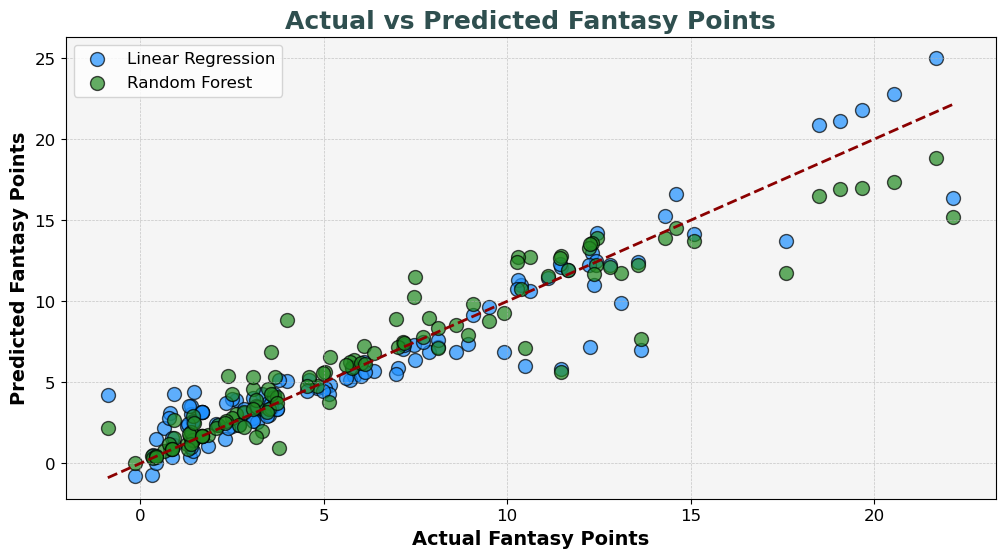

In [ ]:
# Compare Predictions
plt.figure(figsize=(12, 6))

# Scatter plot for Linear Regression
plt.scatter(y_test, y_pred_lr, color="dodgerblue", alpha=0.7, edgecolor='k', label="Linear Regression", s=100)

# Scatter plot for Random Forest
plt.scatter(y_test, y_pred_rf, color="forestgreen", alpha=0.7, edgecolor='k', label="Random Forest", s=100)

# Add a line representing perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="darkred", linestyle="--", linewidth=2)

# Customize plot
plt.title("Actual vs Predicted Fantasy Points", fontsize=18, fontweight='bold', color='darkslategray')
plt.xlabel("Actual Fantasy Points", fontsize=14, fontweight='bold')
plt.ylabel("Predicted Fantasy Points", fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=12)

# Set grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add some extra style improvements
plt.gca().tick_params(axis='both', labelsize=12)
plt.gca().set_facecolor('whitesmoke')

# Show the plot
plt.show()


In [ ]:
# Use the best model for 2023 predictions
best_model = rf_model if r2_rf > r2_lr else lr_model

# Prepare 2023 data for prediction
def prepare_2023_data(df, features):
    return df[features].fillna(0)  # Ensure the features align with the 2022 dataset

df_2023_wr['Predicted_Fantasy_Points'] = best_model.predict(prepare_2023_data(df_2023_wr, features))
df_2023_rb['Predicted_Fantasy_Points'] = best_model.predict(prepare_2023_data(df_2023_rb, features))
df_2023_te['Predicted_Fantasy_Points'] = best_model.predict(prepare_2023_data(df_2023_te, features))
df_2023_qb['Predicted_Fantasy_Points'] = best_model.predict(prepare_2023_data(df_2023_qb, features))

# Save predictions
df_2023_wr.to_excel("2023_WR_Predictions.xlsx", index=False)
df_2023_rb.to_excel("2023_RB_Predictions.xlsx", index=False)
df_2023_te.to_excel("2023_TE_Predictions.xlsx", index=False)
df_2023_qb.to_excel("2023_QB_Predictions.xlsx", index=False)

print("Predictions for 2023 data saved to Excel files.")

Predictions for 2023 data saved to Excel files.


In [ ]:
# Select one player from each position (WR, RB, TE, QB) to project
top_wr_player = df_2023_wr.iloc[0]  # Example: Take the top WR player
top_rb_player = df_2023_rb.iloc[0]  # Example: Take the top RB player
top_te_player = df_2023_te.iloc[0]  # Example: Take the top TE player
top_qb_player = df_2023_qb.iloc[0]  # Example: Take the top QB player

# Calculate average fantasy points per game (assuming 17 games)
avg_wr_points_per_game = top_wr_player['Fantasy_Points_Total'] / 17
avg_rb_points_per_game = top_rb_player['Fantasy_Points_Total'] / 17
avg_te_points_per_game = top_te_player['Fantasy_Points_Total'] / 17
avg_qb_points_per_game = top_qb_player['Fantasy_Points_Total'] / 17


In [ ]:
# Projected fantasy points for 17 weeks
weeks = list(range(1, 18))  # Weeks 1 to 17

# Create dictionaries for each player and their projected points for each week
wr_proj = {week: avg_wr_points_per_game for week in weeks}
rb_proj = {week: avg_rb_points_per_game for week in weeks}
te_proj = {week: avg_te_points_per_game for week in weeks}
qb_proj = {week: avg_qb_points_per_game for week in weeks}

# Convert to DataFrames for easy manipulation
wr_proj_df = pd.DataFrame(list(wr_proj.items()), columns=['Week', 'Projected Fantasy Points'])
rb_proj_df = pd.DataFrame(list(rb_proj.items()), columns=['Week', 'Projected Fantasy Points'])
te_proj_df = pd.DataFrame(list(te_proj.items()), columns=['Week', 'Projected Fantasy Points'])
qb_proj_df = pd.DataFrame(list(qb_proj.items()), columns=['Week', 'Projected Fantasy Points'])


In [ ]:
# Slice the actual points to match the 17-week projection
actual_wr_points = actual_wr_points[:17]  # Only take the first 17 weeks
actual_rb_points = actual_rb_points[:17]
actual_te_points = actual_te_points[:17]
actual_qb_points = actual_qb_points[:17]

# Add the actual points to the DataFrames
wr_proj_df['Actual Fantasy Points'] = actual_wr_points
rb_proj_df['Actual Fantasy Points'] = actual_rb_points
te_proj_df['Actual Fantasy Points'] = actual_te_points
qb_proj_df['Actual Fantasy Points'] = actual_qb_points

In [ ]:
# Calculate the difference (error) between projected and actual points
wr_proj_df['Difference'] = wr_proj_df['Actual Fantasy Points'] - wr_proj_df['Projected Fantasy Points']
rb_proj_df['Difference'] = rb_proj_df['Actual Fantasy Points'] - rb_proj_df['Projected Fantasy Points']
te_proj_df['Difference'] = te_proj_df['Actual Fantasy Points'] - te_proj_df['Projected Fantasy Points']
qb_proj_df['Difference'] = qb_proj_df['Actual Fantasy Points'] - qb_proj_df['Projected Fantasy Points']

# Calculate MAE (Mean Absolute Error) for each position
wr_mae = abs(wr_proj_df['Difference']).mean()
rb_mae = abs(rb_proj_df['Difference']).mean()
te_mae = abs(te_proj_df['Difference']).mean()
qb_mae = abs(qb_proj_df['Difference']).mean()

print(f"WR MAE: {wr_mae:.2f}")
print(f"RB MAE: {rb_mae:.2f}")
print(f"TE MAE: {te_mae:.2f}")
print(f"QB MAE: {qb_mae:.2f}")


WR MAE: 6.49
RB MAE: 6.90
TE MAE: 3.03
QB MAE: 5.20


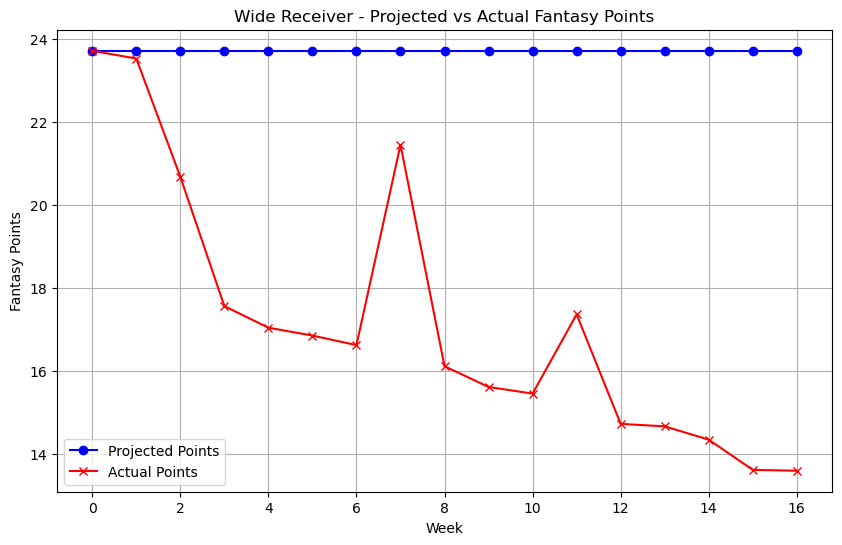

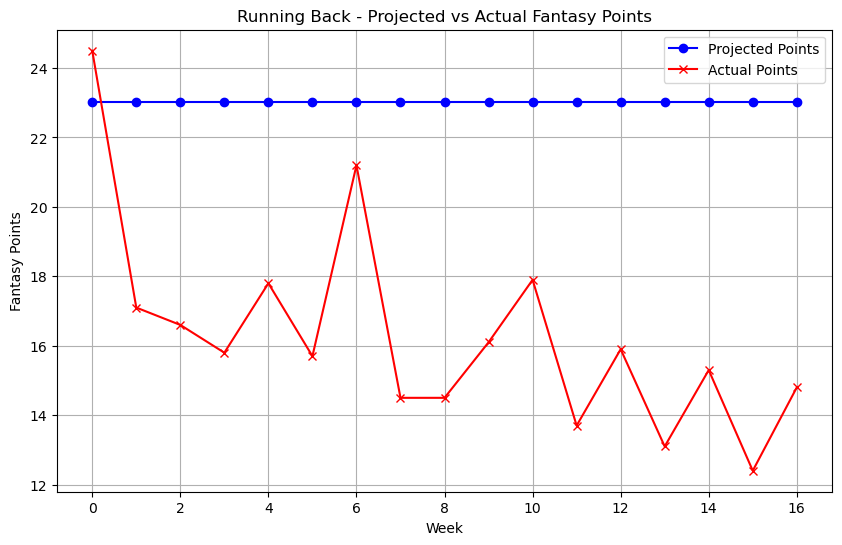

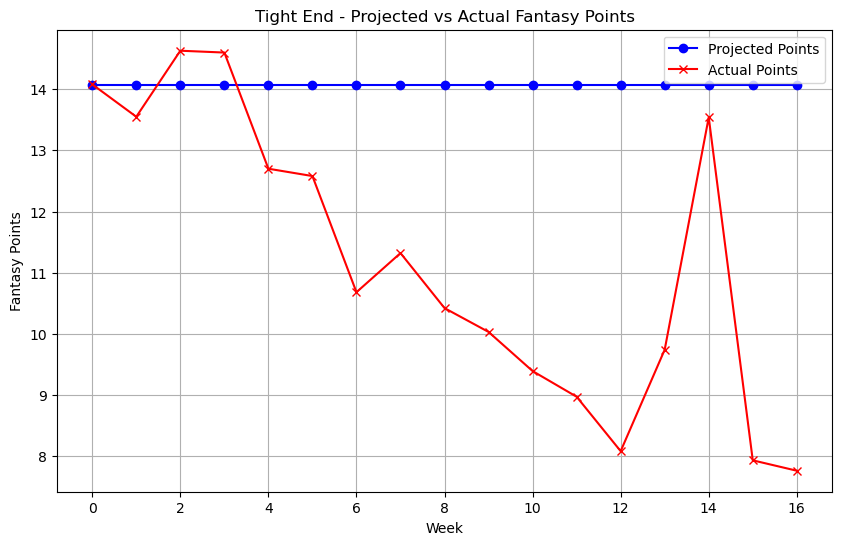

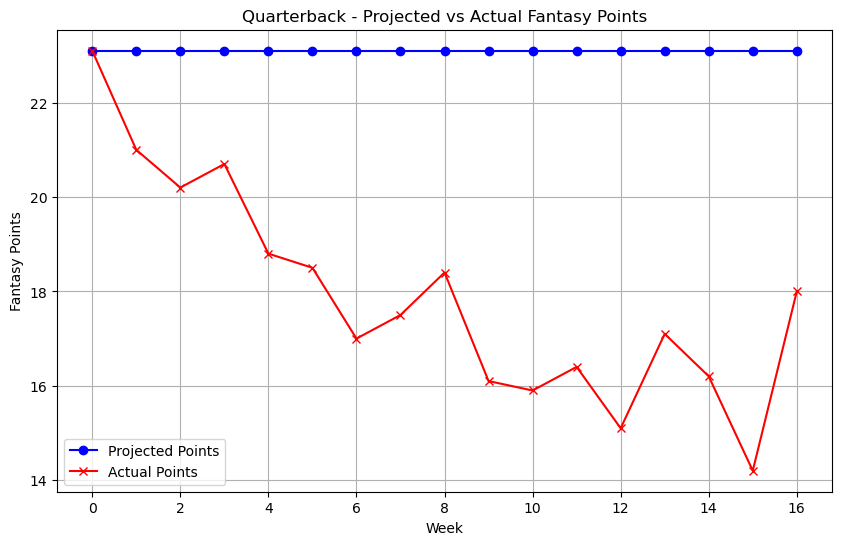

In [ ]:
import matplotlib.pyplot as plt

# Plot the projected vs actual points for each position
def plot_comparison(proj_df, position):
    plt.figure(figsize=(10, 6))
    plt.plot(proj_df['Projected Fantasy Points'], label='Projected Points', marker='o', color='b')
    plt.plot(proj_df['Actual Fantasy Points'], label='Actual Points', marker='x', color='r')
    plt.title(f'{position} - Projected vs Actual Fantasy Points')
    plt.xlabel('Week')
    plt.ylabel('Fantasy Points')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot comparisons for each position
plot_comparison(wr_proj_df, 'Wide Receiver')
plot_comparison(rb_proj_df, 'Running Back')
plot_comparison(te_proj_df, 'Tight End')
plot_comparison(qb_proj_df, 'Quarterback')


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE (Root Mean Squared Error) for each position
wr_rmse = np.sqrt(mean_squared_error(wr_proj_df['Actual Fantasy Points'], wr_proj_df['Projected Fantasy Points']))
rb_rmse = np.sqrt(mean_squared_error(rb_proj_df['Actual Fantasy Points'], rb_proj_df['Projected Fantasy Points']))
te_rmse = np.sqrt(mean_squared_error(te_proj_df['Actual Fantasy Points'], te_proj_df['Projected Fantasy Points']))
qb_rmse = np.sqrt(mean_squared_error(qb_proj_df['Actual Fantasy Points'], qb_proj_df['Projected Fantasy Points']))

print(f"WR RMSE: {wr_rmse:.2f}")
print(f"RB RMSE: {rb_rmse:.2f}")
print(f"TE RMSE: {te_rmse:.2f}")
print(f"QB RMSE: {qb_rmse:.2f}")


WR RMSE: 7.21
RB RMSE: 7.31
TE RMSE: 3.72
QB RMSE: 5.67


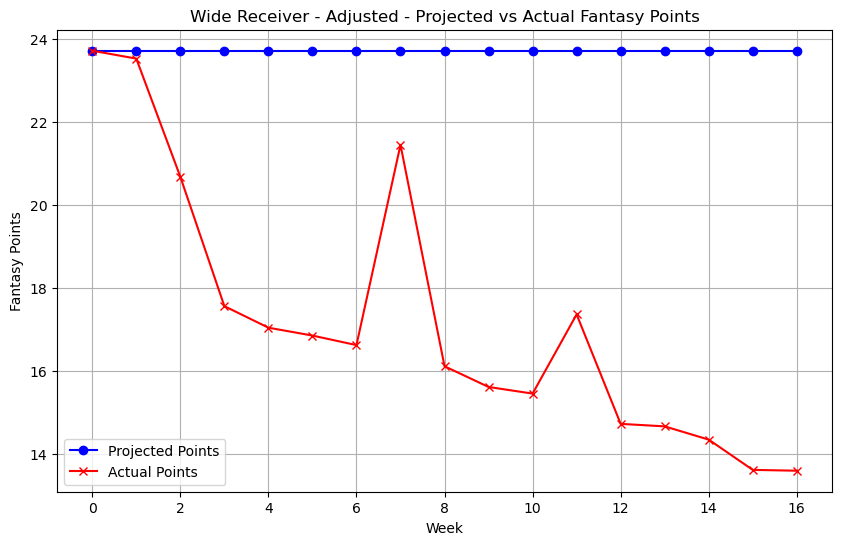

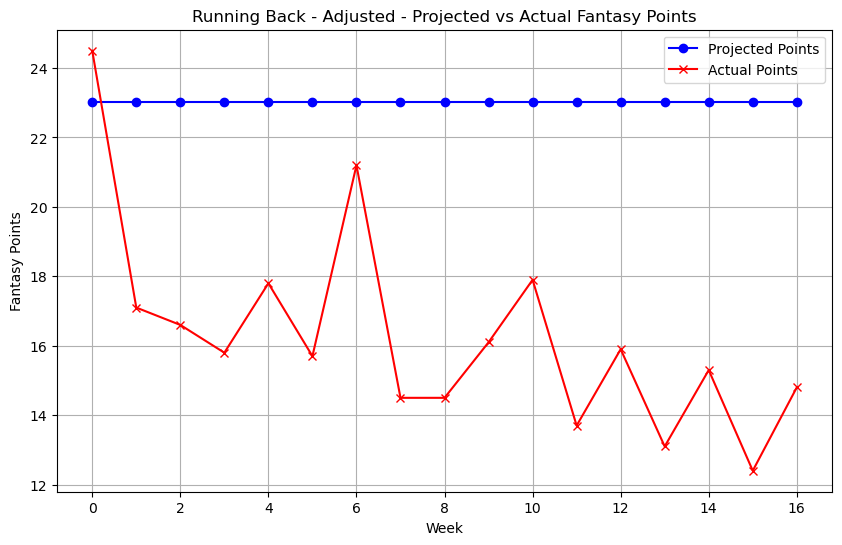

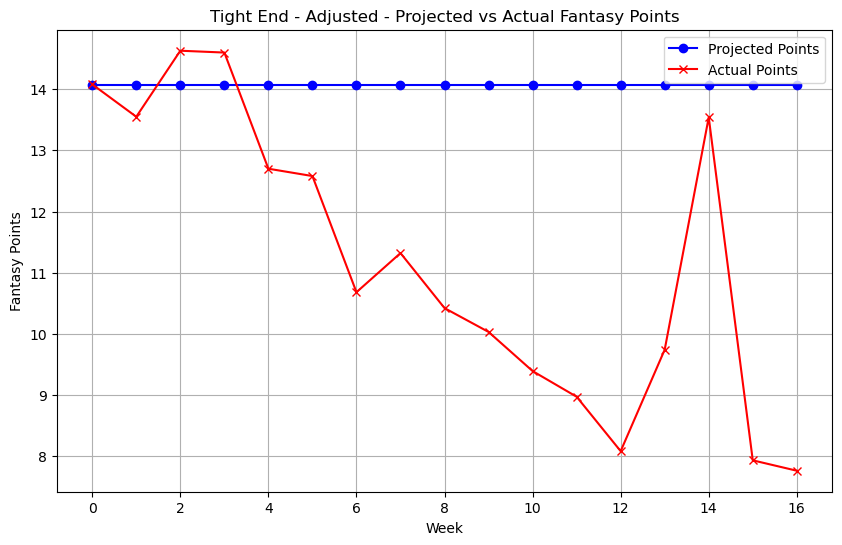

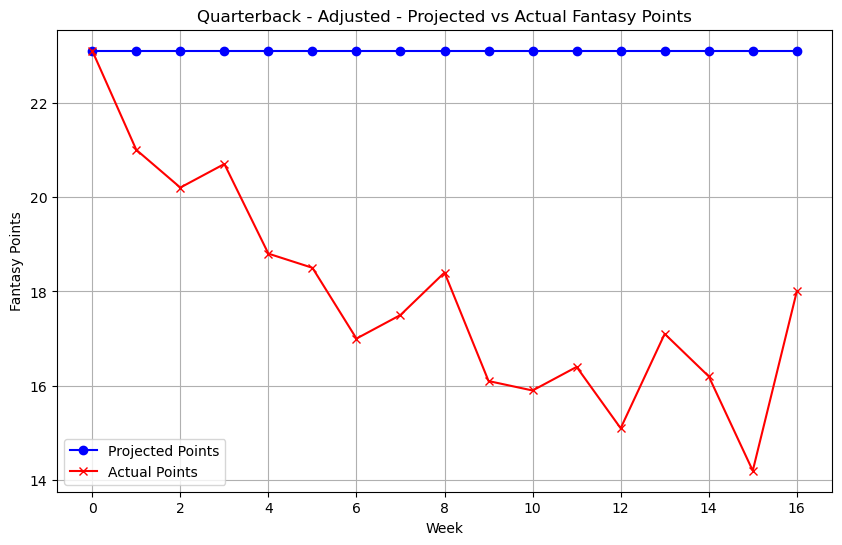

In [ ]:
# Adjust projections based on the mean difference (error)
wr_proj_df['Adjusted Fantasy Points'] = wr_proj_df['Projected Fantasy Points'] + wr_mae
rb_proj_df['Adjusted Fantasy Points'] = rb_proj_df['Projected Fantasy Points'] + rb_mae
te_proj_df['Adjusted Fantasy Points'] = te_proj_df['Projected Fantasy Points'] + te_mae
qb_proj_df['Adjusted Fantasy Points'] = qb_proj_df['Projected Fantasy Points'] + qb_mae

# Visualize the adjusted projections
plot_comparison(wr_proj_df, 'Wide Receiver - Adjusted')
plot_comparison(rb_proj_df, 'Running Back - Adjusted')
plot_comparison(te_proj_df, 'Tight End - Adjusted')
plot_comparison(qb_proj_df, 'Quarterback - Adjusted')

In [ ]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\duezg\Downloads\Data Sets\Fantasy_Projections_With_Actuals.xlsx"

# Save the updated DataFrames with the added columns to Excel
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    wr_proj_df.to_excel(writer, sheet_name='Wide Receiver', index=False)
    rb_proj_df.to_excel(writer, sheet_name='Running Back', index=False)
    te_proj_df.to_excel(writer, sheet_name='Tight End', index=False)
    qb_proj_df.to_excel(writer, sheet_name='Quarterback', index=False)

print(f"Excel file saved at: {file_path}")


Excel file saved at: C:\Users\duezg\Downloads\Data Sets\Fantasy_Projections_With_Actuals.xlsx


In [ ]:
!pip install xlsxwriter


In [ ]:
!pip install openpyxl
